## Analiza wstępna

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
#Wczytanie zbioru z pliku CSV

filename = 'starbucks.csv'
data = pd.read_csv(filename, index_col='Unnamed: 0')

#### Podgląd zbioru

In [3]:
data.head()

,item,calories,fat,carb,fiber,protein,type
1,8-Grain Roll,350,8.0,67,5,10,bakery
2,Apple Bran Muffin,350,9.0,64,7,6,bakery
3,Apple Fritter,420,20.0,59,0,5,bakery
4,Banana Nut Loaf,490,19.0,75,4,7,bakery
5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [4]:
#Typy produktów, ostatnia kolumna
unique_values = data.iloc[:, 6].unique()
print(unique_values)

['bakery' 'bistro box' 'petite' 'hot breakfast' 'salad' 'sandwich'
 'parfait']


In [5]:
# Policzenie ilości wystąpień dla każdej wartości w ostatniej kolumnie
counts = data.iloc[:, -1].value_counts()
# Wyświetlenie wyników
print(counts)

bakery           41
petite            9
bistro box        8
hot breakfast     8
sandwich          7
parfait           3
salad             1
Name: type, dtype: int64


In [6]:
# Tworzenie słownika zamiany wartości
replace_dict = {'bakery': 'bakery', 'petite': 'petite'}

# Zamiana wartości innych niż "bakery" i "petite" na "others" w ostatniej kolumnie
data['type'] = data['type'].map(replace_dict).fillna('others')

# Wyświetlenie zmienionych danych
print(data)

                                     item  calories   fat  carb  fiber  \
1                            8-Grain Roll       350   8.0    67      5   
2                       Apple Bran Muffin       350   9.0    64      7   
3                           Apple Fritter       420  20.0    59      0   
4                         Banana Nut Loaf       490  19.0    75      4   
5             Birthday Cake Mini Doughnut       130   6.0    17      0   
..                                    ...       ...   ...   ...    ...   
73        Tarragon Chicken Salad Sandwich       420  13.0    46      6   
74                Turkey & Swiss Sandwich       390  13.0    36      2   
75             Greek Yogurt Honey Parfait       300  12.0    44      0   
76         Peach Raspberry Yogurt Parfait       300   4.0    57      3   
77  Strawberry & Blueberry Yogurt Parfait       300   3.5    60      3   

    protein    type  
1        10  bakery  
2         6  bakery  
3         5  bakery  
4         7  bakery  
5

In [7]:
#sprawdzenie
# Policzenie ilości wystąpień dla każdej wartości w ostatniej kolumnie
counts = data.iloc[:, -1].value_counts()
# Wyświetlenie wyników
print(counts)

bakery    41
others    27
petite     9
Name: type, dtype: int64


In [114]:
#Typy produktów, ostatnia kolumna
klasy = data.iloc[:, 6].unique()
print(klasy)

['bakery' 'others' 'petite']


In [8]:
data.describe()

,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


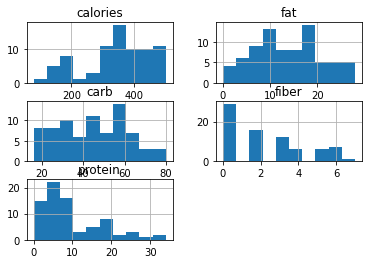

In [9]:
data.hist()
plt.show()

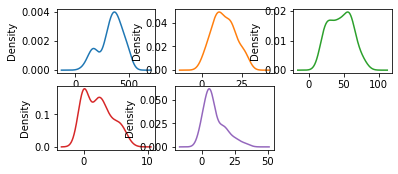

In [10]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=False)
plt.show()

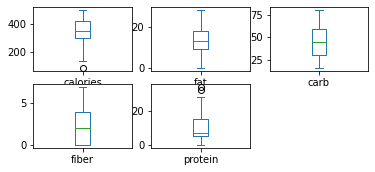

In [11]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False)
plt.show()

In [12]:
#kolumny numeryczne
columns=['calories', 'fat', 'carb', 'fiber', 'protein']

In [13]:
data[columns].corr()

,calories,fat,carb,fiber,protein
calories,1.000000,0.758682,0.674999,0.260645,0.410398
fat,0.758682,1.000000,0.144547,-0.028549,0.223470
carb,0.674999,0.144547,1.000000,0.213044,-0.050789
fiber,0.260645,-0.028549,0.213044,1.000000,0.488564
protein,0.410398,0.223470,-0.050789,0.488564,1.000000


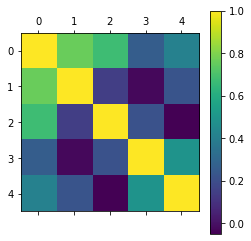

In [14]:
plt.matshow(data[columns].corr())
plt.colorbar()
plt.show()

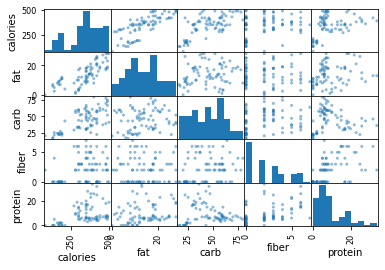

In [15]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

## Przygotowanie danych

### Skalowanie

In [16]:
X=data.values[:,1:6]
Y=data.values[:,6]

In [17]:
#skalowanie cech
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_rescaled=scaler.fit_transform(X)
print(X_rescaled[0:5,:])

[[0.64285714 0.28571429 0.796875   0.71428571 0.29411765]
 [0.64285714 0.32142857 0.75       1.         0.17647059]
 [0.80952381 0.71428571 0.671875   0.         0.14705882]
 [0.97619048 0.67857143 0.921875   0.57142857 0.20588235]
 [0.11904762 0.21428571 0.015625   0.         0.        ]]


In [18]:
#standaryzacja cech
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_rescaled=scaler.fit_transform(X)
print(X_rescaled[0:5,:])

[[ 0.10669269 -0.81799103  1.34578769  1.32406883  0.06471729]
 [ 0.10669269 -0.67613222  1.16334816  2.2769034  -0.43360587]
 [ 0.77538292  0.88431463  0.85928228 -1.05801761 -0.55818666]
 [ 1.44407315  0.74245582  1.8322931   0.84765154 -0.30902508]
 [-1.99490518 -1.10170864 -1.69487111 -1.05801761 -1.18109062]]


In [19]:
#normalizacja wektora cech dla danego przykładu
from sklearn.preprocessing import Normalizer
scaler=Normalizer()
X_rescaled=scaler.fit_transform(X)
print(X_rescaled[0:5,:])

[[0.98143615 0.02243283 0.18787492 0.01402052 0.02804103]
 [0.98304524 0.02527831 0.17975684 0.0196609  0.0168522 ]
 [0.98910911 0.04710043 0.13894628 0.         0.01177511]
 [0.98763228 0.03829595 0.15116821 0.0080623  0.01410903]
 [0.99052111 0.04571636 0.12952968 0.         0.        ]]


### Selekcja cech

In [20]:
#analiza statystyczna
from sklearn.feature_selection import chi2, SelectKBest

selector=SelectKBest(score_func=chi2, k=5)
test=selector.fit(X,Y)
print(test.scores_)
cechy=test.transform(X)
print(cechy[:,0:5])

[802.86965106  14.87201854 206.22810349  37.39589111 311.96090136]
[[350 8.0 67 5 10]
 [350 9.0 64 7 6]
 [420 20.0 59 0 5]
 [490 19.0 75 4 7]
 [130 6.0 17 0 0]
 [370 14.0 47 5 6]
 [460 22.0 61 2 7]
 [370 14.0 55 0 6]
 [310 18.0 32 0 5]
 [420 25.0 39 0 7]
 [380 17.0 51 2 4]
 [320 12.0 53 3 6]
 [300 17.0 34 2 5]
 [420 21.0 57 2 5]
 [310 5.0 52 3 12]
 [480 18.0 70 3 7]
 [490 18.0 73 2 8]
 [410 24.0 46 3 6]
 [130 7.0 16 0 0]
 [280 2.0 56 2 10]
 [360 12.0 58 0 3]
 [490 23.0 67 0 5]
 [420 25.0 42 0 7]
 [440 18.0 59 3 8]
 [350 13.0 54 0 6]
 [210 4.0 43 0 0]
 [350 16.0 45 2 6]
 [300 3.0 60 6 15]
 [420 21.0 57 0 4]
 [370 14.0 56 3 5]
 [140 5.0 21 0 0]
 [280 1.0 59 2 9]
 [390 14.0 61 2 6]
 [480 17.0 78 2 6]
 [480 25.0 59 3 8]
 [430 16.0 69 0 4]
 [400 8.0 80 4 5]
 [340 9.0 62 2 4]
 [350 10.0 59 4 7]
 [440 19.0 63 0 6]
 [490 28.0 52 2 7]
 [480 28.0 39 6 18]
 [270 8.0 29 6 16]
 [360 19.0 32 4 17]
 [380 15.0 35 6 26]
 [380 19.0 37 5 13]
 [420 26.0 22 3 25]
 [350 11.0 50 6 15]
 [380 21.0 25 5 23]
 [1

In [21]:
#Recursive Feature Extraction
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

X=data.values[:,1:6]
Y=data.values[:,6]
model=LogisticRegression(max_iter=int(1e6))
rfe=RFE(model, n_features_to_select=3)
test=rfe.fit(X,Y)

print("liczba cech: ", test.n_features_)
print("maska wybranych cech: ", test.support_)
print("ranking cech: ", test.ranking_)

liczba cech:  3
maska wybranych cech:  [False  True False  True  True]
ranking cech:  [3 1 2 1 1]


In [22]:
# redukcja wymiarowości
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
test=pca.fit(X)
print("komponenty: ", test.components_)
print("wyjaśniona wariancja: ", test.explained_variance_ratio_)
X_PCA=pca.fit_transform(X);
print(X)
print(X_PCA)

komponenty:  [[-9.92556929e-01 -5.03819054e-02 -1.06336195e-01 -5.20422686e-03
  -3.09505258e-02]
 [ 7.47238935e-02  2.49314488e-01 -9.09772915e-01  8.68500562e-04
   3.23374574e-01]
 [-2.35146990e-02 -4.55330805e-01  1.77903359e-01  1.63675758e-01
   8.56552134e-01]]
wyjaśniona wariancja:  [0.9801737  0.01522375 0.00426738]
[[350 8.0 67 5 10]
 [350 9.0 64 7 6]
 [420 20.0 59 0 5]
 [490 19.0 75 4 7]
 [130 6.0 17 0 0]
 [370 14.0 47 5 6]
 [460 22.0 61 2 7]
 [370 14.0 55 0 6]
 [310 18.0 32 0 5]
 [420 25.0 39 0 7]
 [380 17.0 51 2 4]
 [320 12.0 53 3 6]
 [300 17.0 34 2 5]
 [420 21.0 57 2 5]
 [310 5.0 52 3 12]
 [480 18.0 70 3 7]
 [490 18.0 73 2 8]
 [410 24.0 46 3 6]
 [130 7.0 16 0 0]
 [280 2.0 56 2 10]
 [360 12.0 58 0 3]
 [490 23.0 67 0 5]
 [420 25.0 42 0 7]
 [440 18.0 59 3 8]
 [350 13.0 54 0 6]
 [210 4.0 43 0 0]
 [350 16.0 45 2 6]
 [300 3.0 60 6 15]
 [420 21.0 57 0 4]
 [370 14.0 56 3 5]
 [140 5.0 21 0 0]
 [280 1.0 59 2 9]
 [390 14.0 61 2 6]
 [480 17.0 78 2 6]
 [480 25.0 59 3 8]
 [430 16.0 69 

In [23]:
# feature importance by decision tree
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
test=model.fit(X,Y)
print(test.feature_importances_)

[0.17698859 0.11275816 0.24834057 0.10471581 0.35719688]


### Testowanie modelu

In [24]:
#Holdout
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.30, random_state=10)
model=LogisticRegression(max_iter=int(1e6))
model.fit(X_train, Y_train)
metryka=model.score(X_test, Y_test)
print("Dokładność: ",metryka)

Dokładność:  0.9166666666666666


In [25]:
#k-fold CV
from sklearn.model_selection import KFold, cross_val_score
kfold=KFold(n_splits=6, random_state=10, shuffle=True)
model=LogisticRegression(max_iter=int(1e6),solver='saga')
metryka=cross_val_score(model, X, Y, cv=kfold)
print("Dokładność: ",metryka)
print("Średnia dokładność: ", metryka.mean())

Dokładność:  [0.92307692 0.92307692 0.61538462 0.76923077 0.69230769 0.91666667]
Średnia dokładność:  0.8066239316239318


In [26]:
#LOO
from sklearn.model_selection import LeaveOneOut, cross_val_score
cv=LeaveOneOut()
model=LogisticRegression(max_iter=int(1e6),solver='saga')
metryka=cross_val_score(model, X, Y, cv=cv)
print("Dokładność: ", metryka)
print("Średnia dokładność: ", metryka.mean())

Dokładność:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0.]
Średnia dokładność:  0.7792207792207793


In [27]:
#Holdout robiony n razy
from sklearn.model_selection import ShuffleSplit, cross_val_score
kfold=ShuffleSplit(n_splits=6, test_size=0.3, random_state=10)
model=LogisticRegression(max_iter=int(1e6))
metryka=cross_val_score(model, X, Y, cv=kfold)
print("Dokładność: ",metryka)
print("Średnia dokładność: ", metryka.mean())

Dokładność:  [0.91666667 0.79166667 0.75       0.70833333 0.83333333 0.79166667]
Średnia dokładność:  0.7986111111111112


## Metryki

In [28]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
kfold=KFold(n_splits=10, random_state=10, shuffle=True)
model=LogisticRegression(max_iter=int(1e6),solver='saga')
rezultat=cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')


#dla klasyfikacji wieloklasowej nie da się policzyć ROC AUC w prosty sposób, można za to:
recall = cross_val_score(model, X, Y, cv=kfold, scoring='recall_macro')
f1 = cross_val_score(model, X, Y, cv=kfold, scoring='f1_macro')

print("Średnia dokładność: ", rezultat.mean(),' +/- ', rezultat.std())
print("Średnia czułość: ", recall.mean(), ' +/- ', recall.std())
print("Średnie F1-score: ", f1.mean(), ' +/- ', f1.std())
# z precission jest jakiś błąd

Średnia dokładność:  0.8053571428571427  +/-  0.14691773694340457
Średnia czułość:  0.7316666666666667  +/-  0.1938570492800186
Średnie F1-score:  0.6914935064935065  +/-  0.2196881206500558


In [29]:
import sklearn.metrics as sm
sm.get_scorer_names()

AttributeError: module 'sklearn.metrics' has no attribute 'get_scorer_names'

In [ ]:
#Holdout i różne metryki
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.30,
                                                 random_state=10)
model=LogisticRegression(max_iter=int(1e6),)
model.fit(X_train, Y_train)
Y_predicted=model.predict(X_test)
raport=classification_report(Y_test, Y_predicted)
print(raport)

## K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
# Podziel dane na cechy (X) i etykiety (Y)
X=data.values[:,1:6]
Y=data.values[:,6]

# Zastosuj kodowanie etykiet
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

k = 5  # liczba sąsiadów
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred))
cm = confusion_matrix(y_test_hold_out, y_predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

Best number of neighbours is  1
              precision    recall  f1-score   support

      bakery       0.67      1.00      0.80         6
      others       1.00      0.57      0.73         7
      petite       1.00      1.00      1.00         3

    accuracy                           0.81        16
   macro avg       0.89      0.86      0.84        16
weighted avg       0.88      0.81      0.81        16



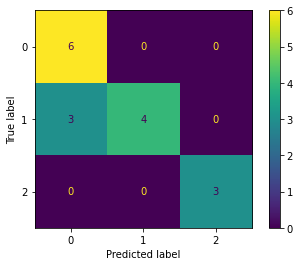

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X=data.values[:,1:6]
y=data.values[:,6]
X_train_hold_out, X_test_hold_out, y_train_hold_out, y_test_hold_out = train_test_split(X, y, test_size=0.2)

i_for_best_acc = 0
best_acc = 0
best_knn = 0

for i in range(1, 21):
    kn = KNeighborsClassifier(n_neighbors=i).fit(X_train_hold_out, y_train_hold_out)
    y_predictions = kn.predict(X_test_hold_out)
    acc = accuracy_score(y_test_hold_out, y_predictions)
    if acc > best_acc:
        best_acc = acc
        i_for_best_acc = i
        best_knn = kn

print('Best number of neighbours is ', i_for_best_acc)
y_predictions = best_knn.predict(X_test_hold_out)

print(classification_report(y_test_hold_out, y_predictions))
cm = confusion_matrix(y_test_hold_out, y_predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Drzewo decyzyjne

In [34]:
import urllib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.75


In [36]:
# -------------------------------

In [37]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

clf.score(X_test, y_test)
y_pred = clf.predict(X_test)

[Text(223.20000000000002, 195.696, 'X[4] <= 12.5\ngini = 0.567\nsamples = 61\nvalue = [35, 18, 8]'),
 Text(186.0, 152.208, 'X[0] <= 200.0\ngini = 0.409\nsamples = 47\nvalue = [35, 4, 8]'),
 Text(111.60000000000001, 108.72, 'X[0] <= 150.0\ngini = 0.544\nsamples = 13\nvalue = [3, 2, 8]'),
 Text(74.4, 65.232, 'X[3] <= 1.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2, 0]'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 8]'),
 Text(260.40000000000003, 108.72, 'X[1] <= 4.5\ngini = 0.111\nsamples = 34\nvalue = [32, 2, 0]'),
 Text(223.20000000000002, 65.232, 'X[3] <= 2.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2, 0]'),
 Text(186.0, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(260.40000000000003, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(297.6, 65.232, 'gini = 0.0\nsamples = 29\nvalue = [29, 0, 0]'),
 Te

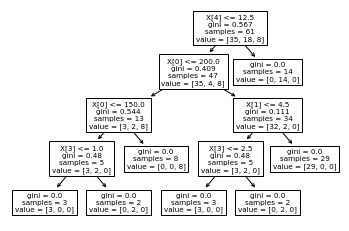

In [38]:
tree.plot_tree(clf)

In [39]:
print(clf)

DecisionTreeClassifier()


In [40]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 16 points : 2


In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      bakery       0.83      0.83      0.83         6
      others       0.89      0.89      0.89         9
      petite       1.00      1.00      1.00         1

    accuracy                           0.88        16
   macro avg       0.91      0.91      0.91        16
weighted avg       0.88      0.88      0.88        16



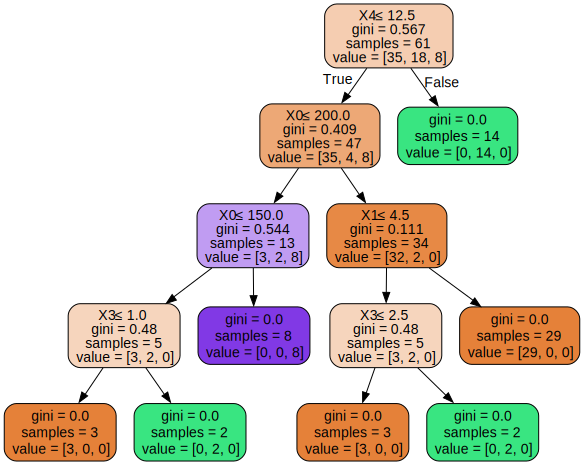

In [44]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [54]:
from sklearn.metrics import mean_squared_error, f1_score, precision_score, recall_score

def print_stats(y_test, y_pred):
    print("\nStatistics for this model:")
    print(f"  Mislabeled points {(y_test != y_pred).sum()} out of {y_test.shape[0]}")
#     print(f"  MSE : {mean_squared_error(y_test, y_pred)}")
    print(f"  Accuracy : {accuracy_score(y_test, y_pred)}")   
    print(f"  Precision : {f1_score(y_test, y_pred, average='weighted')}")
    print("Precission score: {:3f}".format(precision_score(y_test, y_pred, average='macro')))
    print("Recall score: {:3f}".format(recall_score(y_test, y_pred, average='macro')))

print_stats(y_test, y_pred)


Statistics for this model:
  Mislabeled points 2 out of 16
  Accuracy : 0.875
  Precision : 0.875
Precission score: 0.907407
Recall score: 0.907407


In [55]:
from sklearn.tree import export_text
drawn_tree = tree.export_text(clf, feature_names=columns)
print(drawn_tree)

|--- protein <= 12.50
|   |--- calories <= 200.00
|   |   |--- calories <= 150.00
|   |   |   |--- fiber <= 1.00
|   |   |   |   |--- class: bakery
|   |   |   |--- fiber >  1.00
|   |   |   |   |--- class: others
|   |   |--- calories >  150.00
|   |   |   |--- class: petite
|   |--- calories >  200.00
|   |   |--- fat <= 4.50
|   |   |   |--- fiber <= 2.50
|   |   |   |   |--- class: bakery
|   |   |   |--- fiber >  2.50
|   |   |   |   |--- class: others
|   |   |--- fat >  4.50
|   |   |   |--- class: bakery
|--- protein >  12.50
|   |--- class: others



In [56]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## LDA

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

X=data.values[:,1:6]
y=data.values[:,6]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

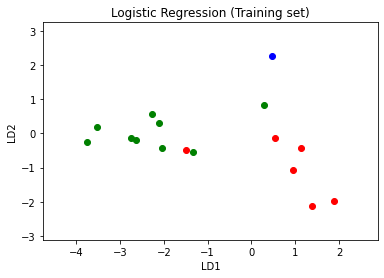

In [107]:
from matplotlib.colors import ListedColormap

X_set = X_test 


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_set = y_test_encoded

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
#              alpha = 0.75, cmap = ListedColormap(['r', 'g', 'b']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['r', 'g', 'b'])(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
#plt.legend()
plt.show()

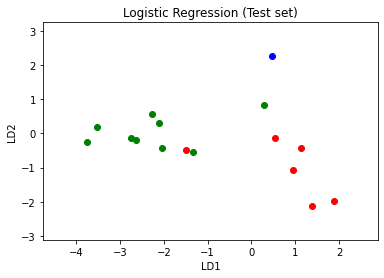

In [108]:
#from matplotlib.colors import ListedColormap
X_set = X_test 


from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_set = y_test_encoded

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(['r', 'g', 'b']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['r', 'g', 'b'])(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
#plt.legend()
plt.show()


In [ ]:
# --------------------------------

In [109]:
import sklearn.datasets as ds
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC

In [111]:
kfolds = 5
lda = LinearDiscriminantAnalysis()
scores = cross_val_score(lda, X, y, cv=kfolds)
scores.mean()

0.8808333333333334